Unused or unrecognized kwargs: padding.


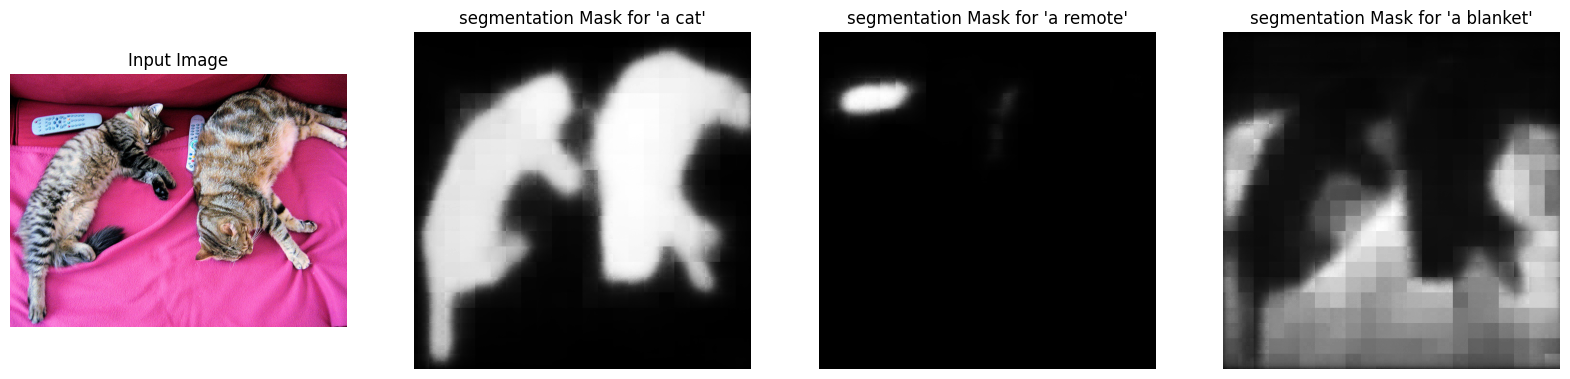

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import requests
from transformers import AutoProcessor, CLIPSegForImageSegmentation


image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)


processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")


texts = ["a cat", "a remote", "a blanket"]
inputs = processor(text=texts, images=[image] * len(texts), padding=True, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
logits = outputs.logits
masks = torch.sigmoid(logits)


fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(image)
axs[0].axis("off")
axs[0].set_title("Input Image")
for i, mask in enumerate(masks):
    axs[i + 1].imshow(mask.squeeze().cpu().numpy(), cmap="gray")
    axs[i + 1].axis("off")
    axs[i + 1].set_title(f"segmentation mask for '{texts[i]}'")
plt.show()
